## Esercizio 8.3

L' obbiettivo è quello di campionare la funzione d' onda dell' esercizio precedente utilizzado il Path Integral projector methods. L' idea è quella di partire da una funzione d'onda di prova e farla evolvere nel tempo con un evoluzione temporale immaginaria. 

Ho campionato la funzione d'onda del GS e misurato l' energia utilizzando due stati di partenza diversi:

1. $\Psi_{T}$=1


2. $\Psi_{T}^{\mu,\sigma}$ con $\mu=0.8$ e $\sigma=0.62$ che è la funzione d'onda trovata nell' esercizio precedente.

Nel primo caso con funzione d'onda costante ho utilizzato un tempo di propagazione immaginaria pari a 8, mentre nel secondo pari a 5. Riporto i risultati ottenuti di seguito .

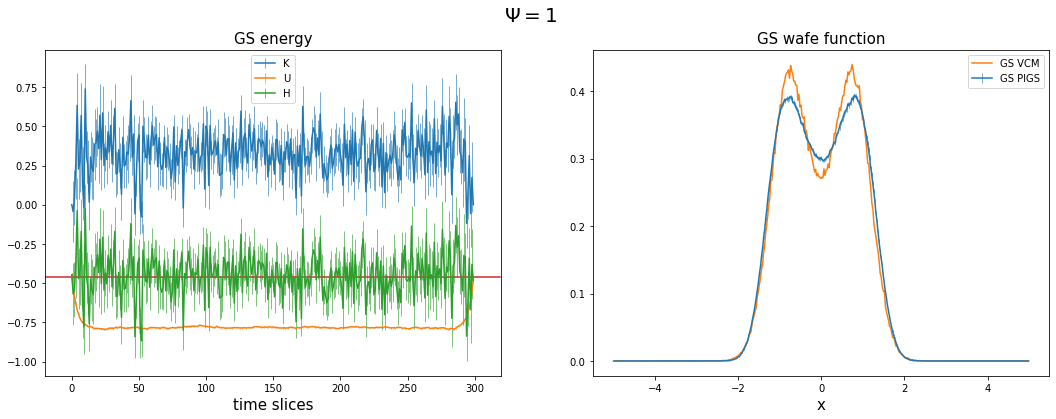

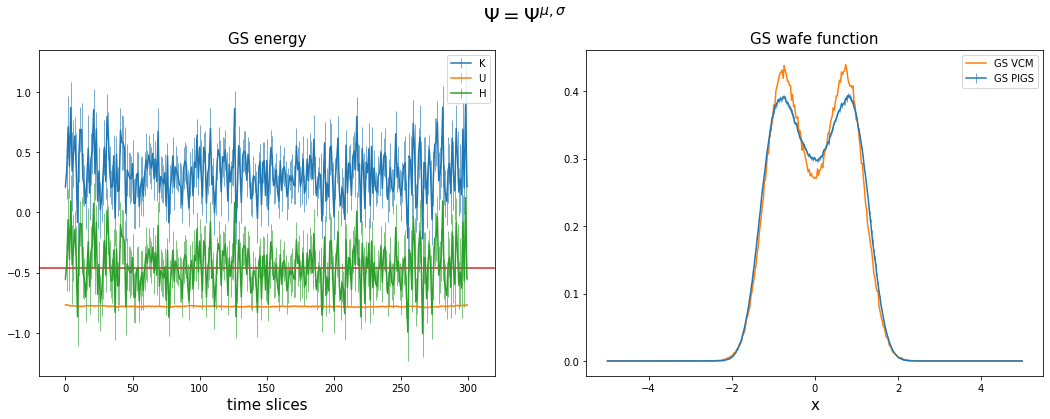

In [44]:
import numpy as np
import matplotlib.pyplot as plt



with open("costante/kinetic_const.dat") as K_out:
    K=np.loadtxt(K_out)
with open("costante/potential_const.dat") as U_out:
    U=np.loadtxt(U_out)
with open("costante/prob_const.dat") as P_out:
    P=np.loadtxt(P_out)
    
with open("psi/kinetic_psi.dat") as psi_K_out:
    psi_K=np.loadtxt(psi_K_out)
with open("psi/potential_psi.dat") as psi_U_out:
    psi_U=np.loadtxt(psi_U_out)
with open("psi/prob_psi.dat") as psi_P_out:
    psi_P=np.loadtxt(psi_P_out)
   
with open("psi.dat") as psi_first_out:
    psi_first=np.loadtxt(psi_first_out)

H=np.zeros((K[:,0].size,3))
H[:,0]=K[:,0]
H[:,1]=K[:,1]+U[:,1]
H[:,2]=np.sqrt(K[:,2]**2+U[:,2]**2)
x=np.arange(-20,320)
y=np.ones(x.size)
y*=-0.46

psi_H=np.zeros((psi_K[:,0].size,3))
psi_H[:,0]=psi_K[:,0]
psi_H[:,1]=psi_K[:,1]+psi_U[:,1]
psi_H[:,2]=np.sqrt(psi_K[:,2]**2+psi_U[:,2]**2)
psi_x=np.arange(-20,320)
psi_y=np.ones(psi_x.size)
psi_y*=-0.46


psi_first_x=np.arange(0,psi_first.size)
isto_y,isto_x=np.histogram(psi_first,bins=np.linspace(-5,5,num=400),density=True)
isto_x=np.delete(isto_x,399)

fig1=plt.figure(figsize=(18,6))
plt.suptitle(r"$\Psi=1$",fontsize=20)
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)

ax1.errorbar(K[:,0],K[:,1],yerr=K[:,2],label="K",elinewidth=0.6)
ax1.errorbar(U[:,0],U[:,1],yerr=U[:,2],label="U",elinewidth=0.6)
ax1.errorbar(H[:,0],H[:,1],yerr=H[:,2],label="H",elinewidth=0.6)
ax1.set_title("GS energy",fontsize=15)
ax1.legend()
ax1.plot(x,y)
ax1.set_xlabel("time slices",fontsize=15)
ax1.set_xlim(-20,320)

ax2.errorbar(P[:,0],P[:,1],yerr=P[:,2],elinewidth=0.6,label='GS PIGS')
ax2.plot(isto_x,isto_y,label='GS VCM')
ax2.set_title("GS wafe function",fontsize=15)
ax2.set_xlabel("x",fontsize=15)
ax2.legend()


fig2=plt.figure(figsize=(18,6))
plt.suptitle(r"$\Psi = \Psi^{\mu,\sigma}$",fontsize=20)
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)

ax1.errorbar(psi_K[:,0],psi_K[:,1],yerr=psi_K[:,2],label="K",elinewidth=0.6)
ax1.errorbar(psi_U[:,0],psi_U[:,1],yerr=psi_U[:,2],label="U",elinewidth=0.6)
ax1.errorbar(psi_H[:,0],psi_H[:,1],yerr=psi_H[:,2],label="H",elinewidth=0.6)
ax1.set_title("GS energy",fontsize=15)
ax1.legend()
ax1.plot(x,y)
ax1.set_xlabel("time slices",fontsize=15)
ax1.set_xlim(-20,320)

ax2.errorbar(P[:,0],P[:,1],yerr=P[:,2],elinewidth=0.6,label='GS PIGS')
ax2.plot(isto_x,isto_y,label='GS VCM')
ax2.set_title("GS wafe function",fontsize=15)
ax2.set_xlabel("x",fontsize=15)
ax2.legend()


plt.show()

I grafici sono analoghi, ma con tempi di evoluzione differenti. In particolare utilizzando la funzione d' onda ottimizzata nell' esercizio precedente la convergenza verso il GS avviene in modo più veloce. Ho infine confrontato i risultati ottenuti con quelli del codice VMC e il metodo path integral risulta essere più preciso: approssima meglio la funzione d' onda attesa.

Utilizzo ora il codice PIMC per vedere come le configurazione campionate e raccolte nell' istogramma cambiano all' aumentare della temperatura. 

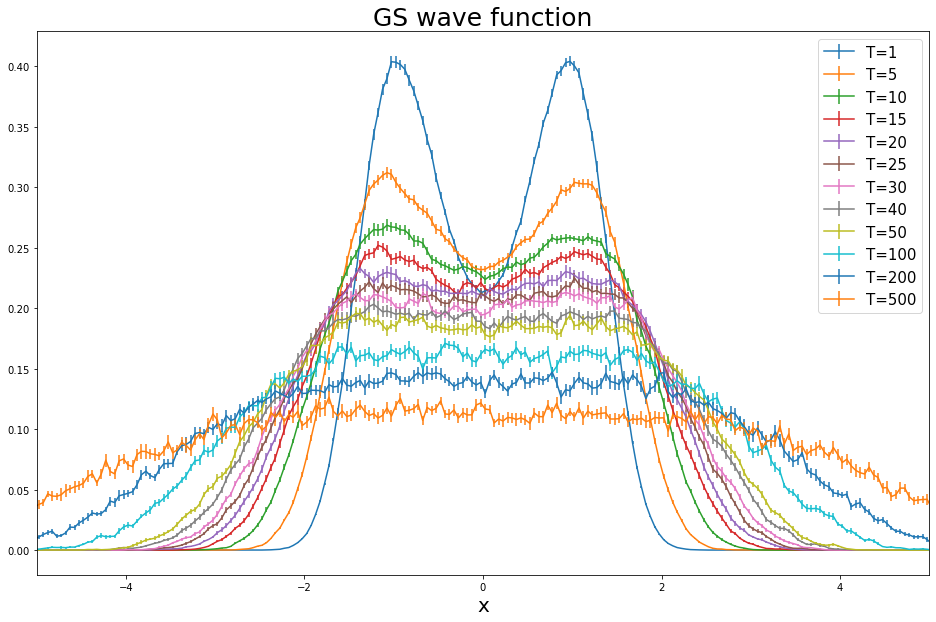

In [68]:
with open("HistTemp/probability.0") as P0_out: #T=1.
    P0=np.loadtxt(P0_out)
with open("HistTemp/probability.1") as P1_out: #T=5.
    P1=np.loadtxt(P1_out)
with open("HistTemp/probability.2") as P2_out: #T=10.
    P2=np.loadtxt(P2_out)
with open("HistTemp/probability.3") as P3_out: #T=15.
    P3=np.loadtxt(P3_out)
with open("HistTemp/probability.4") as P4_out: #T=20.
    P4=np.loadtxt(P4_out)
with open("HistTemp/probability.5") as P5_out: #T=25.
    P5=np.loadtxt(P5_out)
with open("HistTemp/probability.6") as P6_out: #T=30.
    P6=np.loadtxt(P6_out)
with open("HistTemp/probability.7") as P7_out: #T=40.
    P7=np.loadtxt(P7_out)    
with open("HistTemp/probability.8") as P8_out: #T=50.
    P8=np.loadtxt(P8_out)
with open("HistTemp/probability.9") as P9_out: #T=100.
    P9=np.loadtxt(P9_out)
with open("HistTemp/probability.10") as P10_out: #T=200.
    P10=np.loadtxt(P10_out)
with open("HistTemp/probability.11") as P11_out: #T=500.
    P11=np.loadtxt(P11_out)

    
    
plt.figure(figsize=(16,10))
plt.title("GS wave function",fontsize=25)
plt.errorbar(P0[:,0],P0[:,1],yerr=P0[:,2],label='T=1')
plt.errorbar(P1[:,0],P1[:,1],yerr=P1[:,2],label='T=5')
plt.errorbar(P2[:,0],P2[:,1],yerr=P2[:,2],label='T=10')
plt.errorbar(P3[:,0],P3[:,1],yerr=P3[:,2],label='T=15')
plt.errorbar(P4[:,0],P4[:,1],yerr=P4[:,2],label='T=20')
plt.errorbar(P5[:,0],P5[:,1],yerr=P5[:,2],label='T=25')
plt.errorbar(P6[:,0],P6[:,1],yerr=P6[:,2],label='T=30')
plt.errorbar(P7[:,0],P7[:,1],yerr=P7[:,2],label='T=40')
plt.errorbar(P8[:,0],P8[:,1],yerr=P8[:,2],label='T=50')
plt.errorbar(P9[:,0],P9[:,1],yerr=P9[:,2],label='T=100')
plt.errorbar(P10[:,0],P10[:,1],yerr=P10[:,2],label='T=200')
plt.errorbar(P11[:,0],P11[:,1],yerr=P11[:,2],label='T=500')
plt.xlim(-5,5)
plt.legend(fontsize=15)
plt.xlabel("x",fontsize=20)
plt.show()

Ad alte temperature la particella quantistica non è più isomorfa ad un polimero, l' interazione armonica scompare e il polimero diventa un punto. Quindi campionare le configurazioni con il metropolis utilizzando il peso di Boltzmann non è più corretto e infatti come si evince dal grafico la funzione d'onda campionata si allontana sempre di più da quella esatta a T=0.